In [3]:
import pandas as pd
df = pd.read_excel('各品牌汽车销售数据.xlsx')
df.head()

,品牌,2025,2024,2023,2022,2021,2020,合计
0,比亚迪,371457,3489908,2391555,1583025,525711,144149,8505805
1,吉利汽车,208449,1048619,911563,813357,1051807,1007151,5040946
2,长安,120939,827428,960285,844763,868710,807091,4429216
3,奇瑞,95026,545463,392940,287115,326232,247243,1894019
4,特斯拉,63047,661276,610692,441697,322562,147445,2246719


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21772\3178443985.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


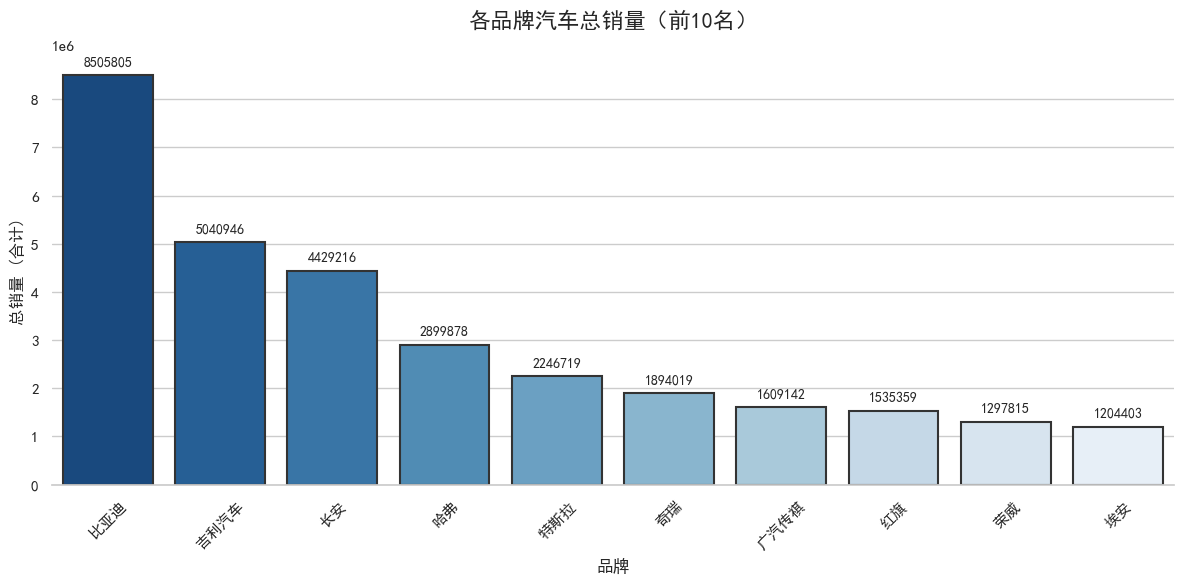

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置Seaborn主题和字体（解决中文显示问题）
sns.set_theme(style="whitegrid")  # 可选主题：darkgrid/whitegrid/dark/white/ticks
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 按合计列降序排序，选择前10个品牌
top_brands = df.sort_values(by='合计', ascending=False).head(10)

# 绘制柱状图
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='品牌', 
    y='合计', 
    data=top_brands,
    palette="Blues_r",  # 颜色方案：Blues/rocket/viridis等
    edgecolor=".2",     # 边框颜色
    linewidth=1.5       # 边框宽度
)

# 添加数据标签
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}", 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10
    )

# 图表美化
plt.title('各品牌汽车总销量（前10名）', fontsize=16, pad=20)
plt.xlabel('品牌', fontsize=12)
plt.ylabel('总销量 (合计)', fontsize=12)
plt.xticks(rotation=45)
sns.despine(left=True)  # 移除左边框
plt.tight_layout()
plt.show()

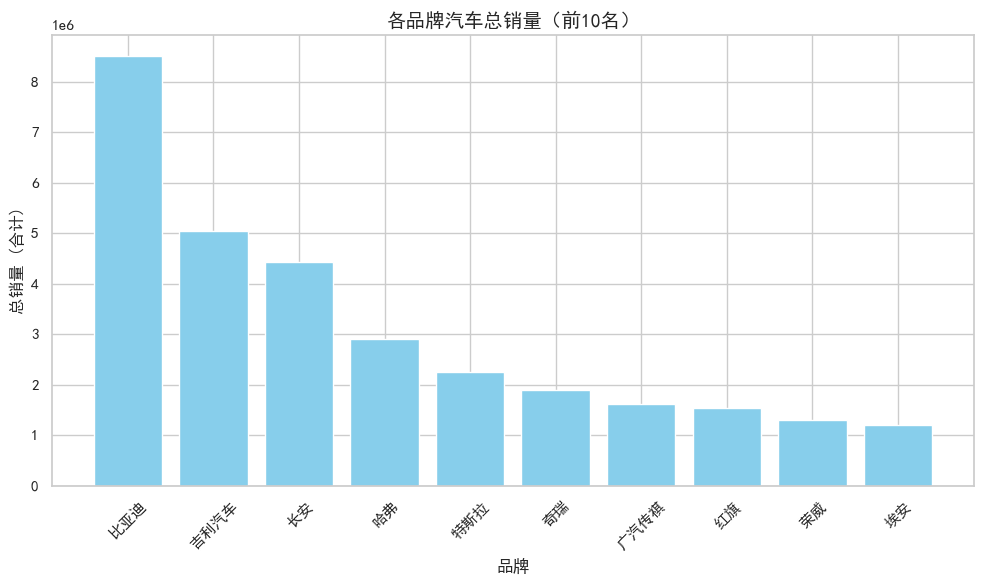

In [6]:
import matplotlib.pyplot as plt

# 按照合计列降序排序，选择前10个品牌
top_brands = df.sort_values(by='合计', ascending=False).head(10)

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(top_brands['品牌'], top_brands['合计'], color='skyblue')
plt.xlabel('品牌', fontsize=12)
plt.ylabel('总销量 (合计)', fontsize=12)
plt.title('各品牌汽车总销量（前10名）', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21772\2398414181.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


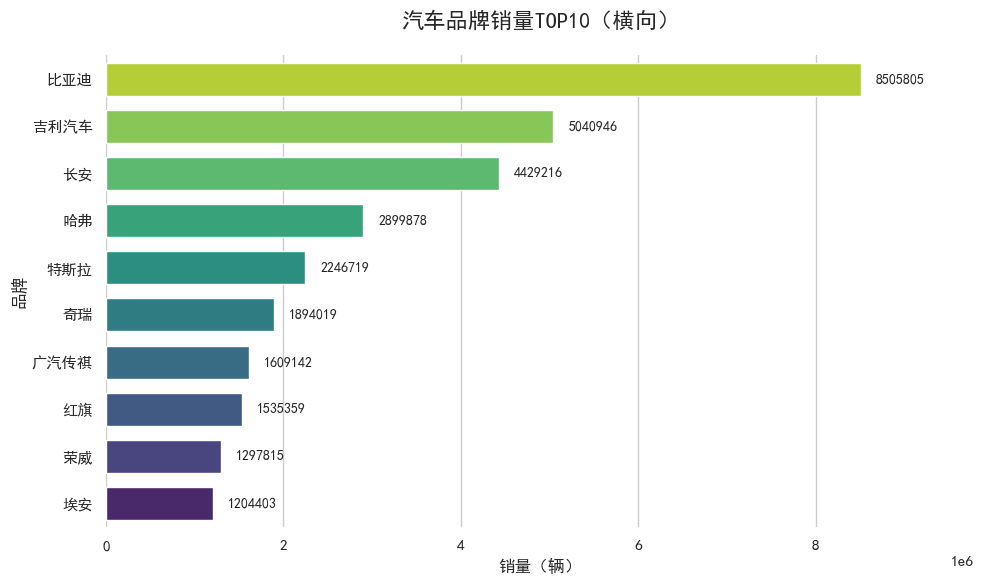

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 主题与样式设置（参考[6][8]）
sns.set_theme(
    style="whitegrid",
    rc={
        'font.sans-serif': ['SimHei'],
        'axes.unicode_minus': False,
        'axes.linewidth': 1.5
    }
)

# 2. 数据处理（按合计降序取前10）
top_brands = df.sort_values('合计', ascending=False).head(10)

# 3. 创建横向条形图（核心参数参考[2][3][5]）
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='合计',
    y='品牌',
    data=top_brands,
    palette="viridis_r",  # 横向图建议使用_r反转色板
    saturation=0.8,
    width=0.7,
    orient='h'            # 关键参数（参考[3]）
)

# 4. 添加数据标签（参考[7]实践）
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + max(top_brands['合计'])*0.02,  # 动态偏移量
        p.get_y() + p.get_height()/2,
        f"{int(width)}",
        va='center',
        fontsize=10
    )

# 5. 图表美化（综合[1][6]）
plt.title('汽车品牌销量TOP10（横向）', fontsize=16, pad=20)
plt.xlabel('销量（辆）', fontsize=12)
plt.ylabel('品牌', fontsize=12)
plt.xlim(0, max(top_brands['合计'])*1.15)  # 扩展X轴范围
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

      

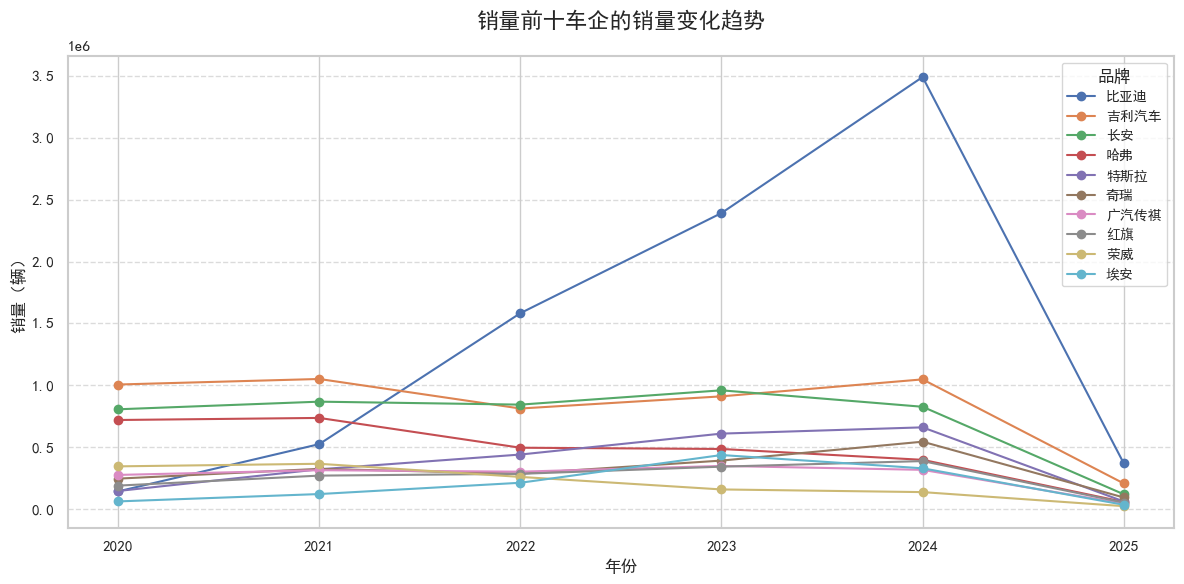

In [11]:
# 提取销量前十车企的年份数据
years = ['2020', '2021', '2022', '2023', '2024', '2025']
top_brands.columns = top_brands.columns.astype(str)  # 将列名转换为字符串
top_brands_time_series = top_brands[['品牌'] + years].set_index('品牌').T

# 绘制折线图
plt.figure(figsize=(12, 6))
for brand in top_brands_time_series.columns:
    plt.plot(top_brands_time_series.index, top_brands_time_series[brand], marker='o', label=brand)

# 图表美化
plt.title('销量前十车企的销量变化趋势', fontsize=16, pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('销量（辆）', fontsize=12)
plt.legend(title='品牌', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

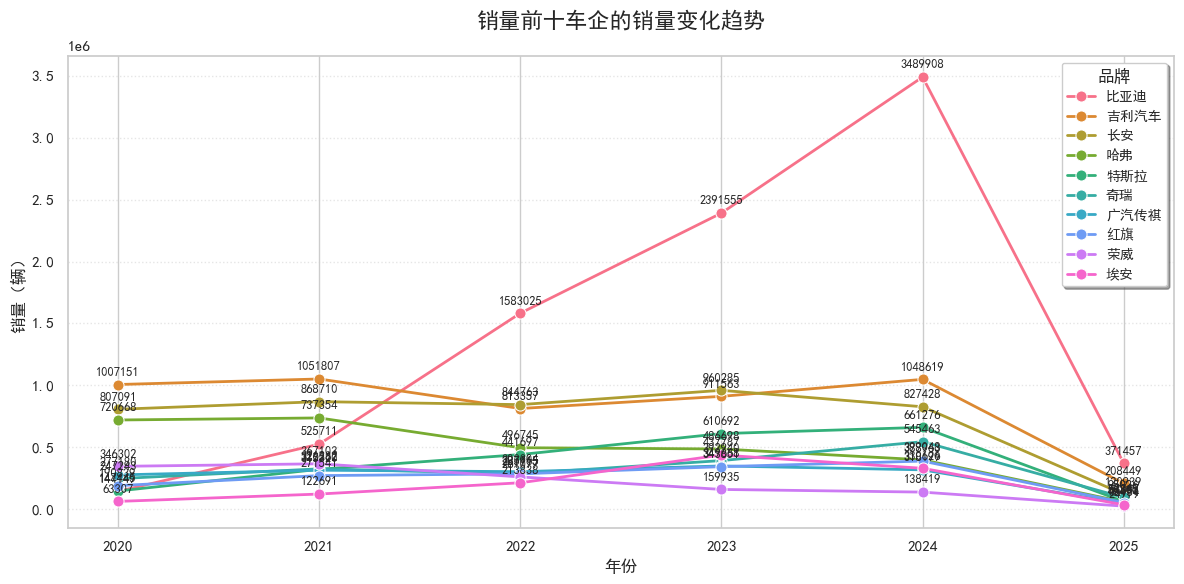

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置主题和字体
sns.set_theme(style="whitegrid", rc={
    'font.sans-serif': ['SimHei'],
    'axes.unicode_minus': False
})

# 提取数据（保持原代码逻辑）
years = ['2020', '2021', '2022', '2023', '2024', '2025']
top_brands.columns = top_brands.columns.astype(str)
top_brands_time_series = top_brands[['品牌'] + years].set_index('品牌').T

# 创建图形
plt.figure(figsize=(12, 6))

# 使用Seaborn绘制折线图（核心优化）
sns.lineplot(
    data=top_brands_time_series.melt(ignore_index=False).reset_index(),
    x='index',
    y='value',
    hue='品牌',
    marker='o',
    markersize=8,
    linewidth=2,
    palette="husl"  # 使用husl调色板[8](@ref)
)

# 高级美化（综合[6,8](@ref)）
plt.title('销量前十车企的销量变化趋势', fontsize=16, pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('销量（辆）', fontsize=12)
plt.legend(
    title='品牌',
    fontsize=10,
    frameon=True,
    shadow=True,
    facecolor='white'
)
plt.grid(axis='y', linestyle=':', alpha=0.5)

# 添加数据标签（参考[7](@ref)）
for brand in top_brands_time_series.columns:
    for x, y in zip(top_brands_time_series.index, top_brands_time_series[brand]):
        plt.text(
            x=x,
            y=y+0.02*max(top_brands_time_series.max()),
            s=f'{int(y)}',
            ha='center',
            fontsize=9
        )

plt.tight_layout()
plt.show()